In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')



eps=1e-8 
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = (iris.data).flatten()  # we only take the first two features.
y = iris.target

print(X)


[5.1 3.5 1.4 0.2 4.9 3.  1.4 0.2 4.7 3.2 1.3 0.2 4.6 3.1 1.5 0.2 5.  3.6
 1.4 0.2 5.4 3.9 1.7 0.4 4.6 3.4 1.4 0.3 5.  3.4 1.5 0.2 4.4 2.9 1.4 0.2
 4.9 3.1 1.5 0.1 5.4 3.7 1.5 0.2 4.8 3.4 1.6 0.2 4.8 3.  1.4 0.1 4.3 3.
 1.1 0.1 5.8 4.  1.2 0.2 5.7 4.4 1.5 0.4 5.4 3.9 1.3 0.4 5.1 3.5 1.4 0.3
 5.7 3.8 1.7 0.3 5.1 3.8 1.5 0.3 5.4 3.4 1.7 0.2 5.1 3.7 1.5 0.4 4.6 3.6
 1.  0.2 5.1 3.3 1.7 0.5 4.8 3.4 1.9 0.2 5.  3.  1.6 0.2 5.  3.4 1.6 0.4
 5.2 3.5 1.5 0.2 5.2 3.4 1.4 0.2 4.7 3.2 1.6 0.2 4.8 3.1 1.6 0.2 5.4 3.4
 1.5 0.4 5.2 4.1 1.5 0.1 5.5 4.2 1.4 0.2 4.9 3.1 1.5 0.2 5.  3.2 1.2 0.2
 5.5 3.5 1.3 0.2 4.9 3.6 1.4 0.1 4.4 3.  1.3 0.2 5.1 3.4 1.5 0.2 5.  3.5
 1.3 0.3 4.5 2.3 1.3 0.3 4.4 3.2 1.3 0.2 5.  3.5 1.6 0.6 5.1 3.8 1.9 0.4
 4.8 3.  1.4 0.3 5.1 3.8 1.6 0.2 4.6 3.2 1.4 0.2 5.3 3.7 1.5 0.2 5.  3.3
 1.4 0.2 7.  3.2 4.7 1.4 6.4 3.2 4.5 1.5 6.9 3.1 4.9 1.5 5.5 2.3 4.  1.3
 6.5 2.8 4.6 1.5 5.7 2.8 4.5 1.3 6.3 3.3 4.7 1.6 4.9 2.4 3.3 1.  6.6 2.9
 4.6 1.3 5.2 2.7 3.9 1.4 5.  2.  3.5 1.  5.9 3.  4.2

In [55]:


def PDF(data, means, variances):
    return 1/(np.sqrt(2 * np.pi * variances) + eps) * np.exp(-1/2 * (np.square(data - means) / (variances + eps)))

def EM_GMM(data, k=3, iterations=100, init_strategy='kmeans'):
    weights = np.ones((k, 1)) / k # shape=(k, 1)
    
    if init_strategy=='kmeans':
        from sklearn.cluster import KMeans
        
        km = KMeans(k).fit(data[:, None])
        means = km.cluster_centers_ # shape=(k, 1)
        
    else: # init_strategy=='random'
        means = np.random.choice(data, k)[:, np.newaxis] # shape=(k, 1)
    
    variances = np.random.random_sample(size=k)[:, np.newaxis] # shape=(k, 1)

    data = np.repeat(data[np.newaxis, :], k, 0) # shape=(k, n)

    for step in range(iterations):
        # Expectation step
        likelihood = PDF(data, means, np.sqrt(variances)) # shape=(k, n)

        # Maximization step
        b = likelihood * weights # shape=(k, n)
        b /= np.sum(b, axis=1)[:, np.newaxis] + eps

        # updage means, variances, and weights
        means = np.sum(b * data, axis=1)[:, np.newaxis] / (np.sum(b, axis=1)[:, np.newaxis] + eps)
        variances = np.sum(b * np.square(data - means), axis=1)[:, np.newaxis] / (np.sum(b, axis=1)[:, np.newaxis] + eps)
        weights = np.mean(b, axis=1)[:, np.newaxis]
        
    return means, variances

463833
[[  4.9513814 ]
 [ 70.93893118]
 [152.06976422]
 [ 37.12369774]] [[0.65791449]
 [0.96496081]
 [0.97651027]
 [0.96763957]]


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

[]

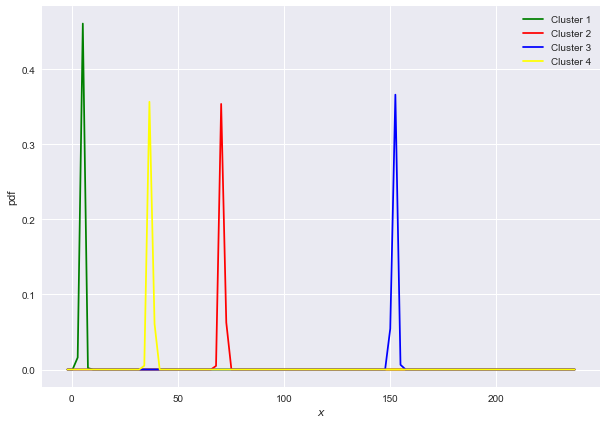

In [61]:
s = np.array([25.31      , 24.31      , 24.12      , 43.46      , 41.48666667,
              41.48666667, 37.54      , 41.175     , 44.81      , 44.44571429,
              44.44571429, 44.44571429, 44.44571429, 44.44571429, 44.44571429,
              44.44571429, 44.44571429, 44.44571429, 44.44571429, 44.44571429,
              44.44571429, 44.44571429, 39.71      , 26.69      , 34.15      ,
              24.94      , 24.75      , 24.56      , 24.38      , 35.25      ,
              44.62      , 44.94      , 44.815     , 44.69      , 42.31      ,
              40.81      , 44.38      , 44.56      , 44.44      , 44.25      ,
              43.66666667, 43.66666667, 43.66666667, 43.66666667, 43.66666667,
              40.75      , 32.31      , 36.08      , 30.135     , 24.19      ])

#s = X

import cv2


img = cv2.imread("mini_data/0.jpg")

asss = (np.array(img)).flatten()

print(len(asss))

s = asss
k=4
n_iter=100

means, variances = EM_GMM(s, k, n_iter)
print(means,variances)


# Plotting the results
colors = ['green', 'red', 'blue', 'yellow']
bins = np.linspace(np.min(s)-2, np.max(s)+2, 100)

plt.figure(figsize=(10,7))
plt.xlabel('$x$')
plt.ylabel('pdf')

#sns.scatterplot(s, [0.05] * len(s), color='navy', s=40, marker=2, label='Series data')

for i, (m, v) in enumerate(zip(means, variances)):
    sns.lineplot(bins, PDF(bins, m, v), color=colors[i], label=f'Cluster {i+1}')

plt.legend()
plt.plot()